## Import dataset

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, KFold

In [20]:
df = pd.read_csv('./SRC/aerogerador2.dat', sep=' ')

In [3]:
df.columns = ['Null', 'Speed', 'Potency']

In [4]:
df = df.drop(columns='Null')

## Linear Regression

#### Analisy and plot

<AxesSubplot:xlabel='Speed', ylabel='Potency'>

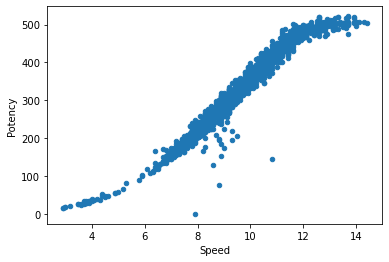

In [5]:
df.plot.scatter('Speed','Potency')

### Apply linear regression model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Potency'), df['Potency'], test_size=0.25, shuffle=True)
model = LinearRegression().fit(X_train, y_train)
predict = model.predict(X_test)

### Scores

In [7]:
print('MAE: ', mean_absolute_error(y_test, predict))
print('MSE: ', mean_squared_error(y_test, predict))
print('MSSE', np.sqrt(mean_squared_error(y_test, predict)))

MAE:  15.603448521134919
MSE:  600.8550387692029
MSSE 24.512344619991023


## Polynomial regression

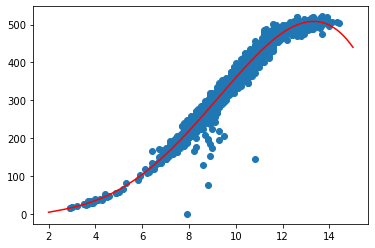

In [8]:
test = np.polyfit(df['Speed'], df['Potency'], 4)
mymodel = np.poly1d(test)

myline = np.linspace(2, 15, 100)

plt.scatter(df['Speed'], df['Potency'])
plt.plot(myline, mymodel(myline), color='red')
plt.show()

### Poly metrics

In [9]:
y_predict  = []
for i in X_test['Speed'].values:
    y_predict.append(mymodel(i))

In [10]:
print('MAE: ', mean_absolute_error(y_test, y_predict))
print('MSE: ', mean_squared_error(y_test, y_predict))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_predict)))

MAE:  11.518656990080018
MSE:  421.0056209006
RMSE 20.51842150119253


## Removing outliers

In [11]:
from sklearn.neighbors import LocalOutlierFactor

In [12]:
clf = LocalOutlierFactor(n_neighbors=3)
predict = clf.fit_predict(df)

In [13]:
new_df = {'Speed':[], 'Potency':[]}
for i in df.index:
    if predict[i] == 1:
        new_df['Speed'].append(df['Speed'][i])
        new_df['Potency'].append(df['Potency'][i])
new_df = pd.DataFrame(new_df)

<AxesSubplot:xlabel='Speed', ylabel='Potency'>

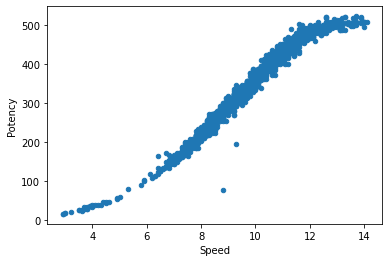

In [14]:
new_df.plot.scatter('Speed', 'Potency')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns='Potency'), new_df['Potency'], test_size=0.25, shuffle=True)

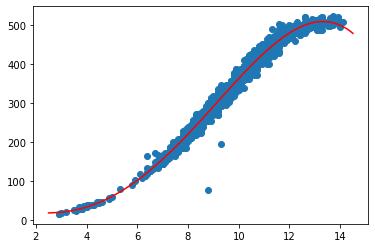

In [16]:
test = np.polyfit(new_df['Speed'], new_df['Potency'], 4)
mymodel = np.poly1d(test)

myline = np.linspace(2.5, 14.5, 100)

plt.scatter(new_df['Speed'], new_df['Potency'])
plt.plot(myline, mymodel(myline), color='red')
plt.show()

In [17]:
y_predict  = []
for i in X_test['Speed'].values:
    y_predict.append(mymodel(i))

In [18]:
print('MAE removing outliers: ', mean_absolute_error(y_test, y_predict))
print('MSE removing outliers: ', mean_squared_error(y_test, y_predict))
print('RMSE removing outliers', np.sqrt(mean_squared_error(y_test, y_predict)))

MAE removing outliers:  8.921080592246467
MSE removing outliers:  135.5547243385168
RMSE removing outliers 11.642797101148709


## Results

In the graph, we see that the data closely resembled a third-degree curve. However, used as two regression techniques for this dataset. As expected, polynomial regression had better results, but linear regression had interesting results, not having a very high error. This fact is due to the fact that between speed values ​​5 and 12, the power value remains in a straight line. Another point to analyze is the removal of outliers, as without them it obtained the best results.